<a href="https://colab.research.google.com/github/sahiltambe18/DL_CLG/blob/main/lab4_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# a. Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc

In [2]:
# b. Upload / access the dataset
def load_and_preprocess_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Normalize and reshape the data
    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.
    x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
    x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

    # Select only images of digit '1' as normal data
    normal_digit = 1
    x_train_normal = x_train[y_train == normal_digit]
    x_test_normal = x_test[y_test == normal_digit]
    x_test_anomaly = x_test[y_test != normal_digit]

    return x_train_normal, x_test_normal, x_test_anomaly

In [3]:
# c. Encoder converts it into latent representation
# d. Decoder networks convert it back to the original input
def build_autoencoder(input_dim, encoding_dim):
    # Encoder
    input_layer = Input(shape=(input_dim,))
    encoder = Dense(encoding_dim, activation='relu')(input_layer)

    # Decoder
    decoder = Dense(input_dim, activation='sigmoid')(encoder)

    # Autoencoder model
    autoencoder = Model(inputs=input_layer, outputs=decoder)

    # Separate encoder model
    encoder_model = Model(inputs=input_layer, outputs=encoder)

    return autoencoder, encoder_model


In [4]:

# e. Compile the models with Optimizer, Loss, and Evaluation Metrics
def compile_and_train(autoencoder, x_train, epochs=50, batch_size=256):
    autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    history = autoencoder.fit(x_train, x_train,
                              epochs=epochs,
                              batch_size=batch_size,
                              shuffle=True,
                              validation_split=0.2,
                              verbose=1)

    return history

def plot_loss(history):
    plt.figure(figsize=(10, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()


In [5]:

def detect_anomalies(autoencoder, normal_data, anomaly_data):
    normal_reconstructed = autoencoder.predict(normal_data)
    anomaly_reconstructed = autoencoder.predict(anomaly_data)

    normal_mse = np.mean(np.square(normal_data - normal_reconstructed), axis=1)
    anomaly_mse = np.mean(np.square(anomaly_data - anomaly_reconstructed), axis=1)

    return normal_mse, anomaly_mse

def plot_roc_curve(normal_mse, anomaly_mse):
    y_true = np.concatenate([np.zeros(len(normal_mse)), np.ones(len(anomaly_mse))])
    y_scores = np.concatenate([normal_mse, anomaly_mse])

    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 0.2238 - val_loss: 0.1216
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0862 - val_loss: 0.0330
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0319 - val_loss: 0.0265
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0268 - val_loss: 0.0222
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0220 - val_loss: 0.0189
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0194 - val_loss: 0.0168
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0172 - val_loss: 0.0153
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0160 - val_loss: 0.0144
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0154 - val_loss: 0.0136
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0144 - val_loss: 0.0132
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0137 - val_loss: 0.0127
Epoch 12/50
22/22 ━━━━

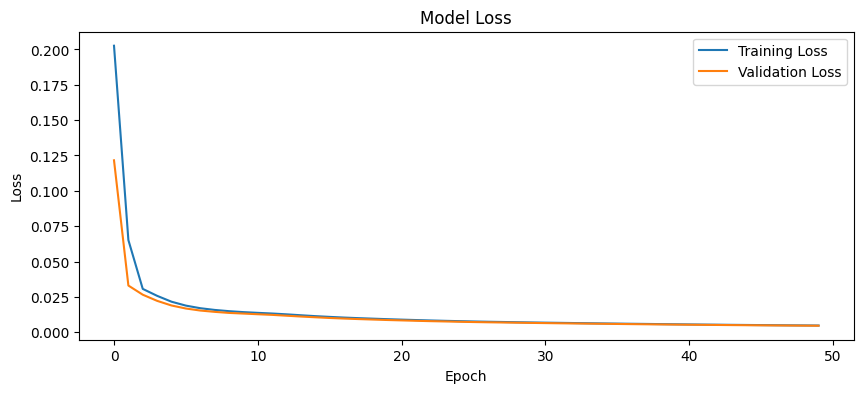

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


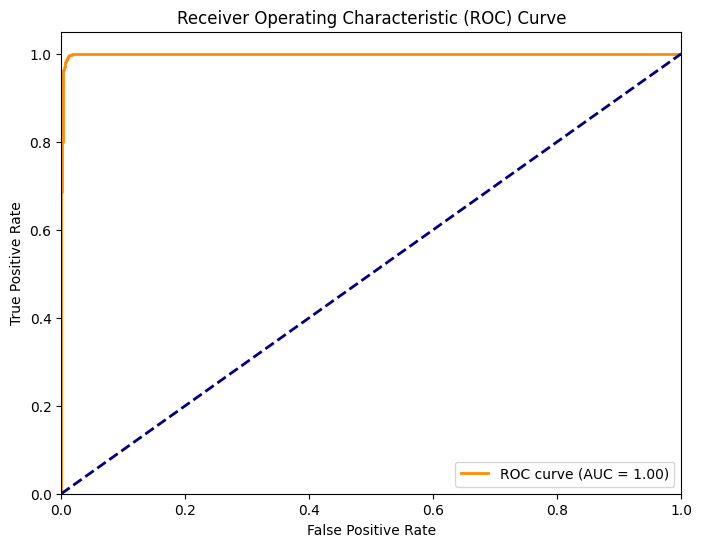

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


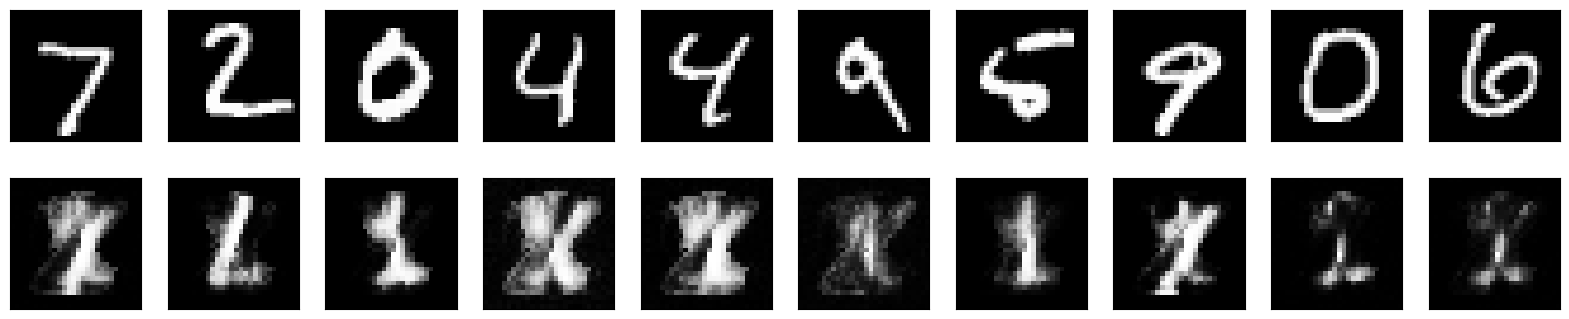

In [6]:

# Main execution
if __name__ == "__main__":
    # Load and preprocess data
    x_train_normal, x_test_normal, x_test_anomaly = load_and_preprocess_data()

    # Build autoencoder
    input_dim = x_train_normal.shape[1]
    encoding_dim = 32
    autoencoder, encoder = build_autoencoder(input_dim, encoding_dim)

    # Compile and train
    history = compile_and_train(autoencoder, x_train_normal)

    # Plot training history
    plot_loss(history)

    # Detect anomalies
    normal_mse, anomaly_mse = detect_anomalies(autoencoder, x_test_normal, x_test_anomaly)

    # Plot ROC curve
    plot_roc_curve(normal_mse, anomaly_mse)

    # Visualize some results
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test_anomaly[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(autoencoder.predict(x_test_anomaly[i].reshape(1, 784)).reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()